In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.pandas.set_option('max_columns',None)

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [4]:
data.shape

(1460, 81)

In [5]:
#finding features with nan values
nan_features=[features for features in data.columns if data[features].isnull().sum()>0]

for features in nan_features:
    print(features,np.round(data[features].isnull().mean(),4),'%missing values')

LotFrontage 0.1774 %missing values
Alley 0.9377 %missing values
MasVnrType 0.0055 %missing values
MasVnrArea 0.0055 %missing values
BsmtQual 0.0253 %missing values
BsmtCond 0.0253 %missing values
BsmtExposure 0.026 %missing values
BsmtFinType1 0.0253 %missing values
BsmtFinType2 0.026 %missing values
Electrical 0.0007 %missing values
FireplaceQu 0.4726 %missing values
GarageType 0.0555 %missing values
GarageYrBlt 0.0555 %missing values
GarageFinish 0.0555 %missing values
GarageQual 0.0555 %missing values
GarageCond 0.0555 %missing values
PoolQC 0.9952 %missing values
Fence 0.8075 %missing values
MiscFeature 0.963 %missing values


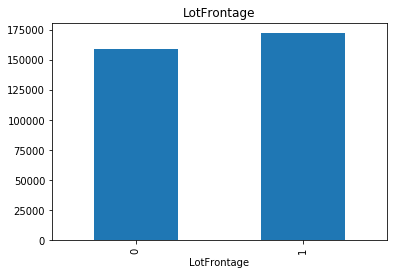

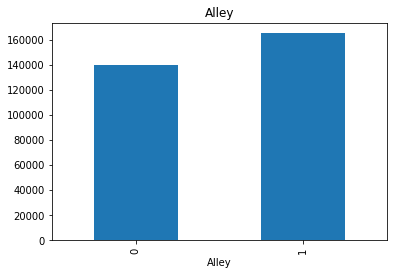

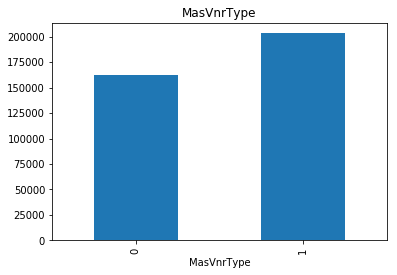

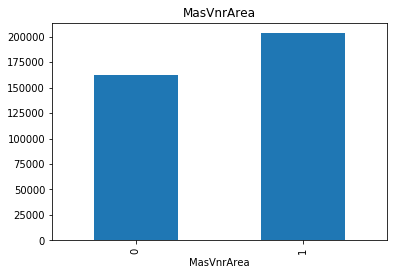

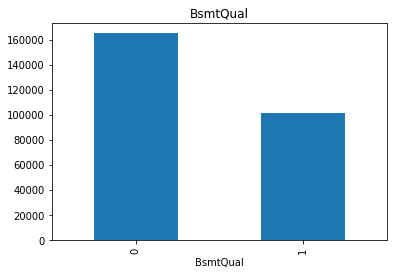

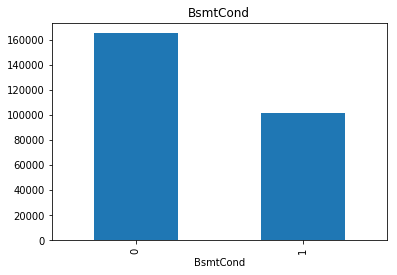

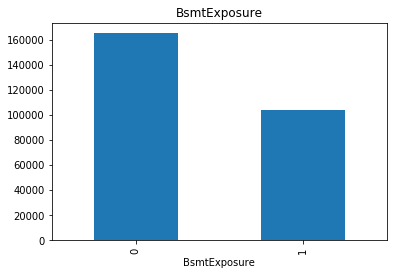

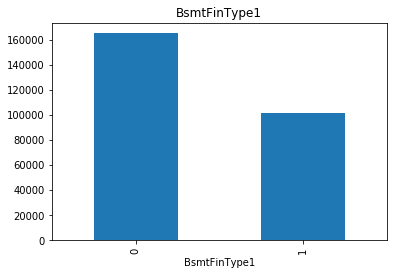

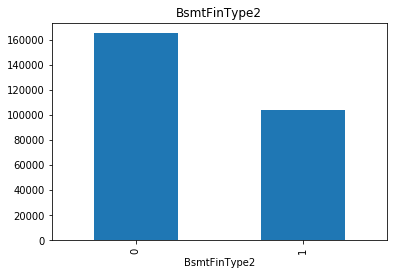

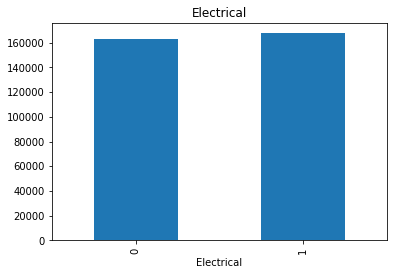

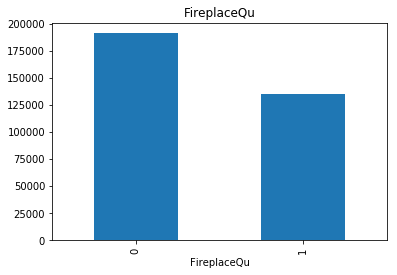

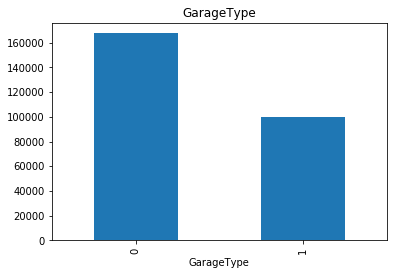

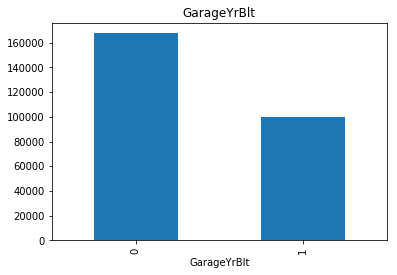

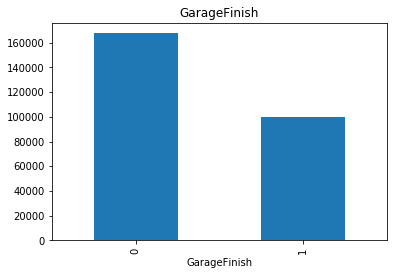

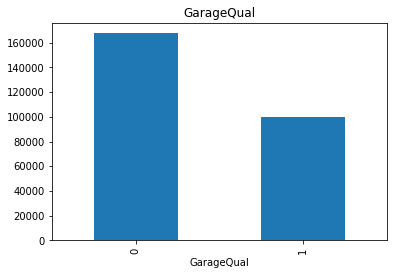

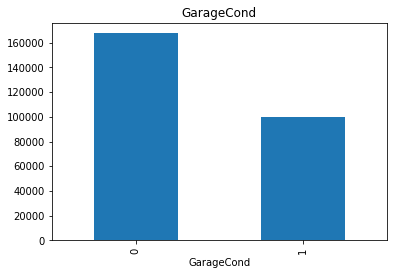

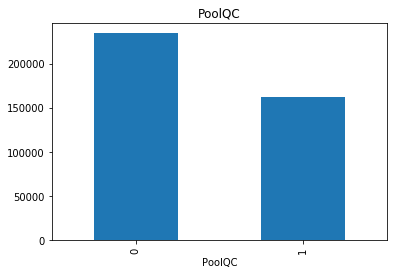

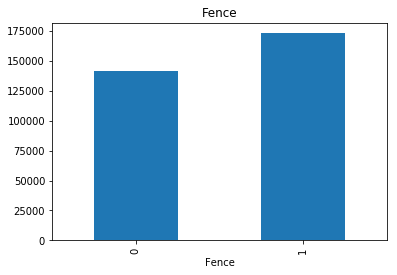

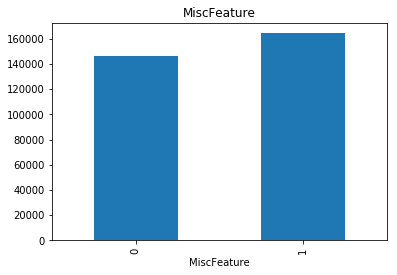

In [6]:
#for finding the relationship between the missing values wrt to sales
for features in nan_features:
    dataset=data.copy()
    dataset[features]=np.where(dataset[features].isnull(),1,0)
    dataset.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

In [7]:
print("Id of Houses {}".format(len(data.Id)))

Id of Houses 1460


In [8]:
#list of numerical feature
numerical_features=[features for features in data.columns if data[features].dtypes !='O']
print('Number of numerical features:',len(numerical_features))

Number of numerical features: 38


In [9]:
#let us dicover year feature
year_feature=[features for features in numerical_features if 'Yr' in features or 'Year' in features]

Text(0, 0.5, 'salesprice')

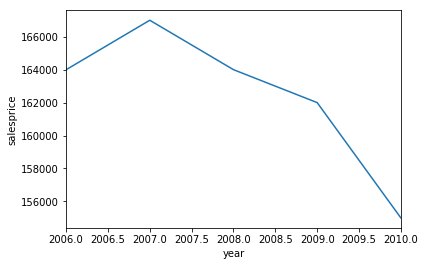

In [11]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('year')
plt.ylabel('salesprice')

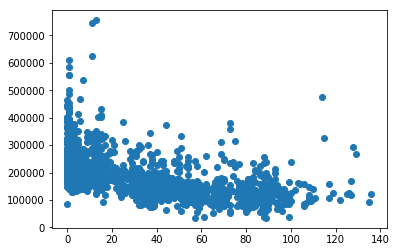

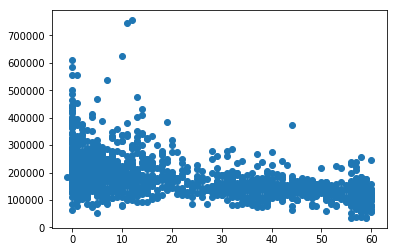

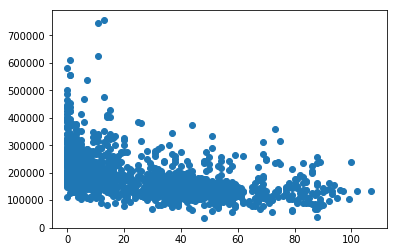

In [12]:
for feature in year_feature:
    if feature!='YrSold':
        datanew=data.copy()
        datanew[feature]=datanew['YrSold']-datanew[feature]
        plt.scatter(datanew[feature],datanew['SalePrice'])
        plt.show()

In [13]:
#discrete features
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id'] ]
print('Discrete features :{}',len(discrete_feature))

Discrete features :{} 17


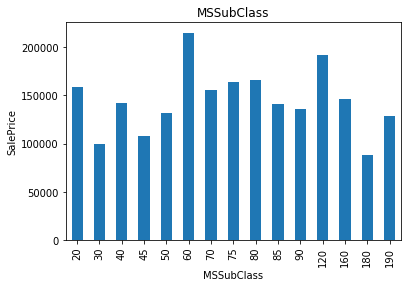

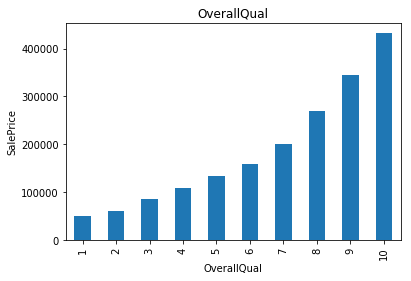

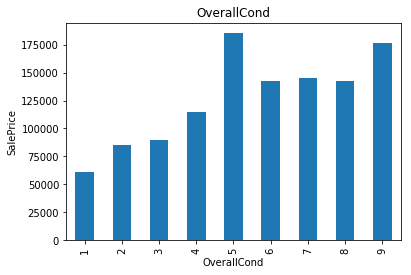

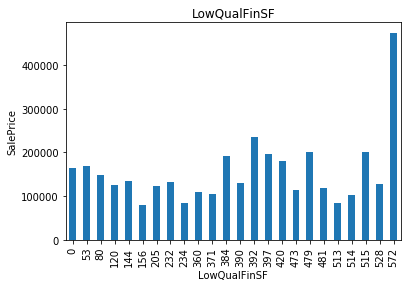

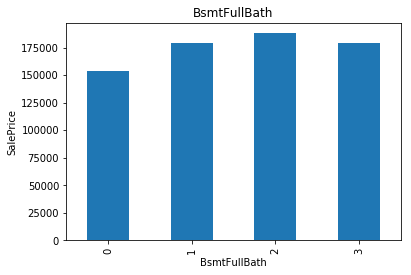

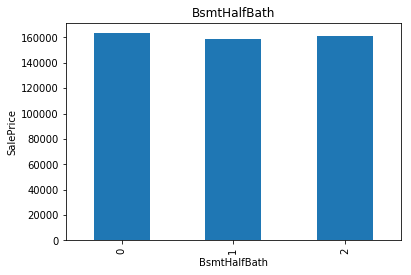

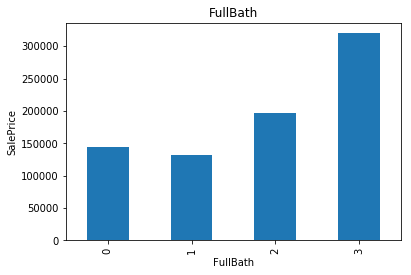

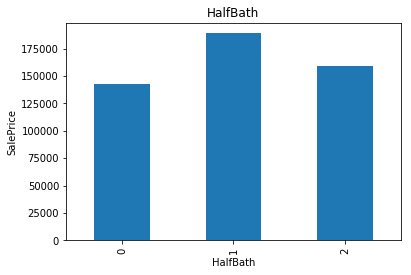

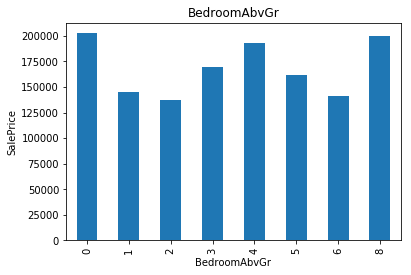

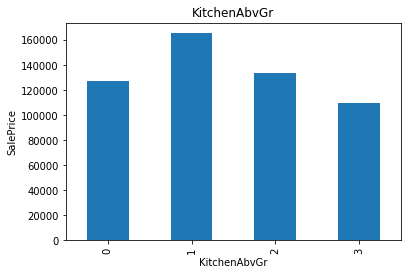

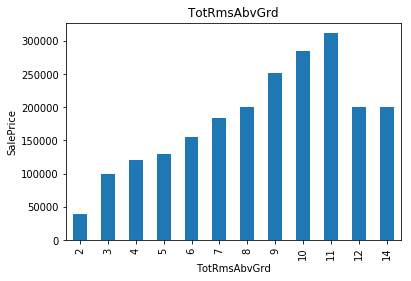

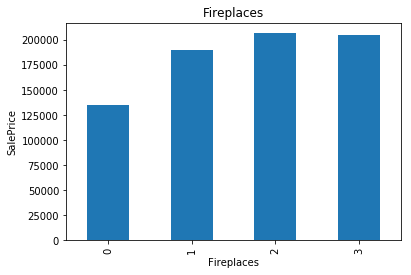

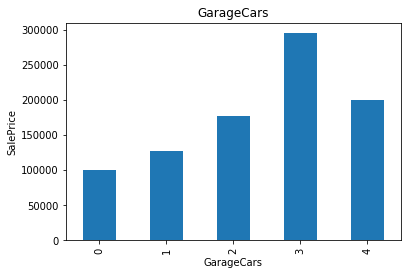

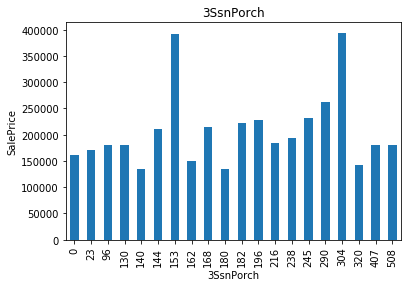

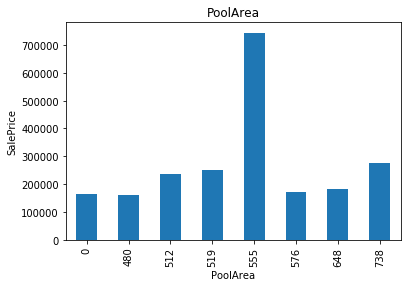

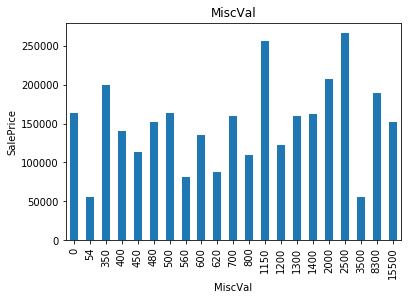

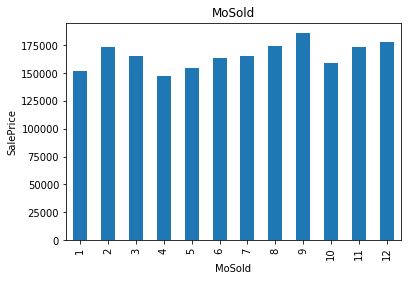

In [14]:

for feature in discrete_feature:
    dataset=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [15]:
continous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id'] ]

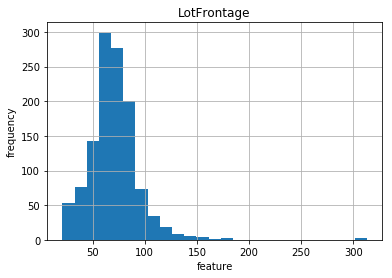

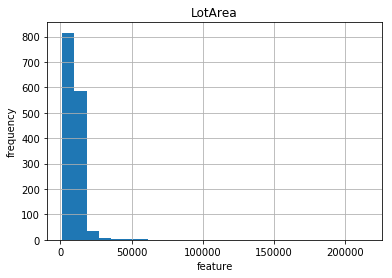

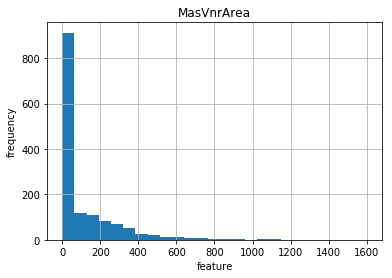

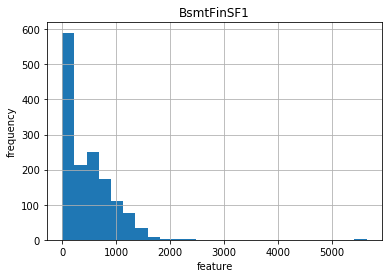

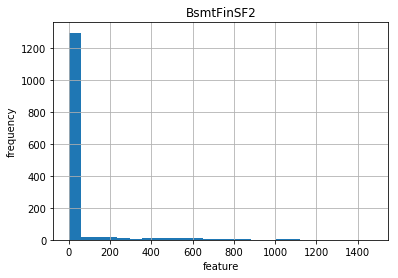

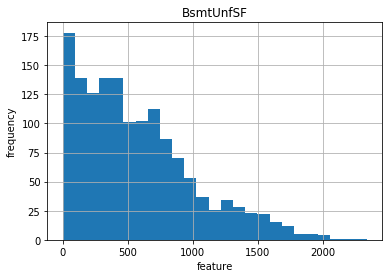

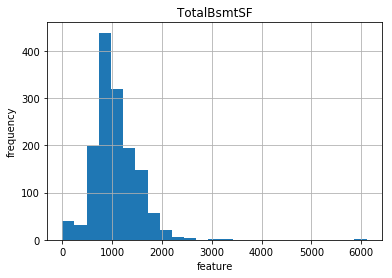

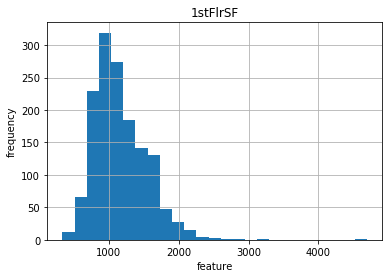

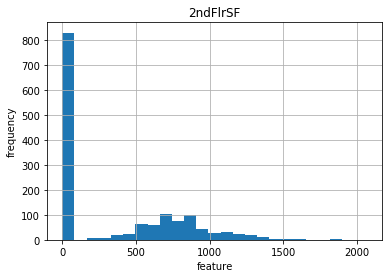

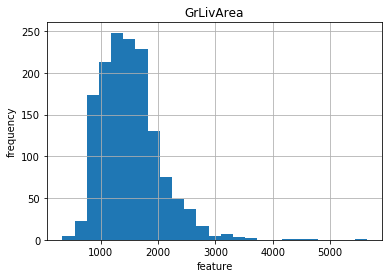

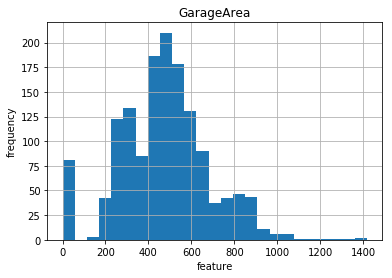

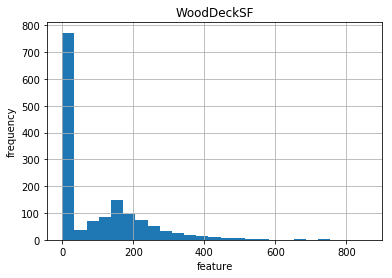

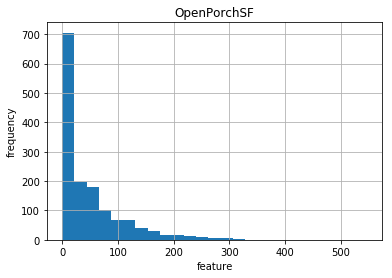

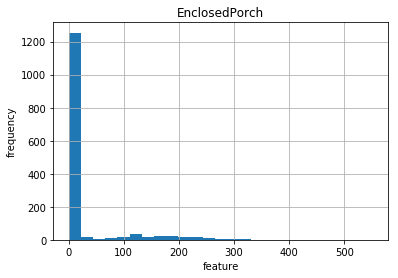

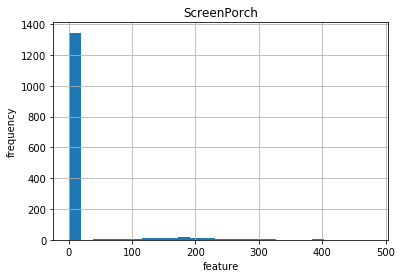

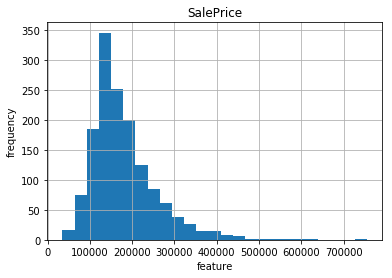

In [18]:
for feature in continous_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel('feature')
    plt.ylabel('frequency')
    plt.title(feature)
    plt.show()

In [27]:
##categorical features
categorical_feature=[feature for feature in data.columns if data[feature].dtypes=='O']
print('The Number categorical features are:',len(categorical_feature))

The Number categorical features are: 43


In [29]:
#let us see the unique values inside each categorical feature
for feature in categorical_feature:
    print('The feature is {} and The number of unique features are:',feature,len(data[feature].unique()))

The feature is {} and The number of unique features are: MSZoning 5
The feature is {} and The number of unique features are: Street 2
The feature is {} and The number of unique features are: Alley 3
The feature is {} and The number of unique features are: LotShape 4
The feature is {} and The number of unique features are: LandContour 4
The feature is {} and The number of unique features are: Utilities 2
The feature is {} and The number of unique features are: LotConfig 5
The feature is {} and The number of unique features are: LandSlope 3
The feature is {} and The number of unique features are: Neighborhood 25
The feature is {} and The number of unique features are: Condition1 9
The feature is {} and The number of unique features are: Condition2 8
The feature is {} and The number of unique features are: BldgType 5
The feature is {} and The number of unique features are: HouseStyle 8
The feature is {} and The number of unique features are: RoofStyle 6
The feature is {} and The number of

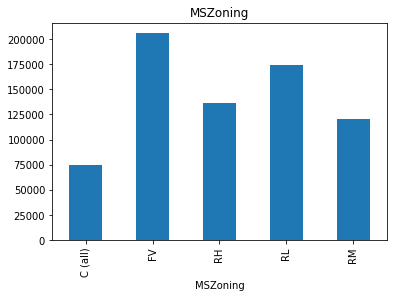

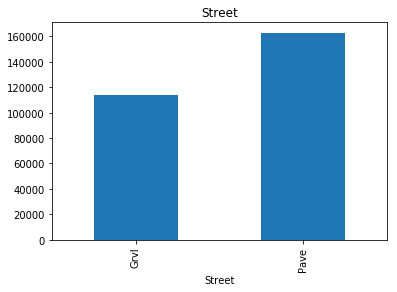

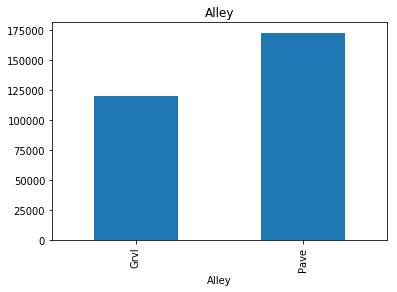

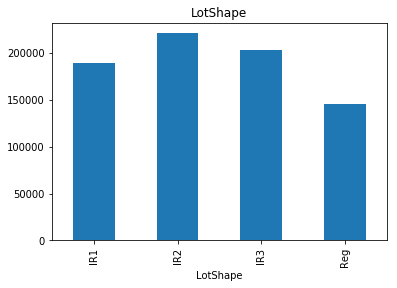

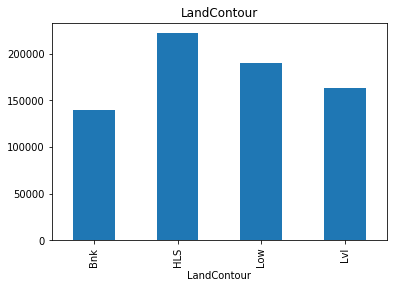

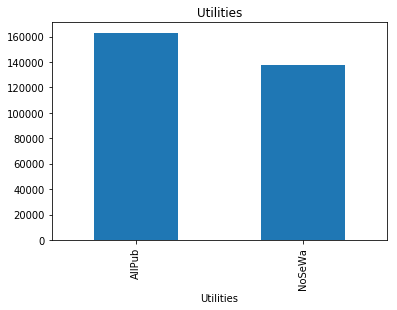

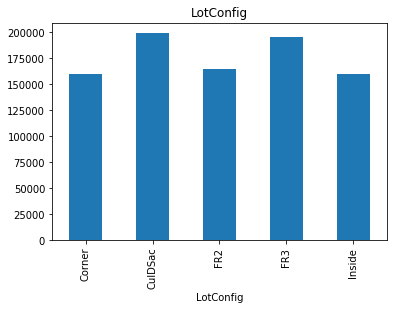

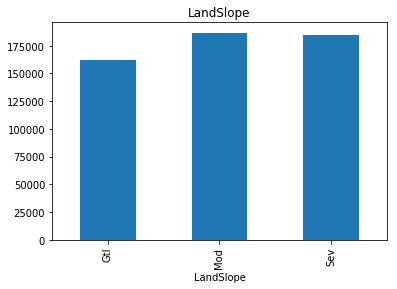

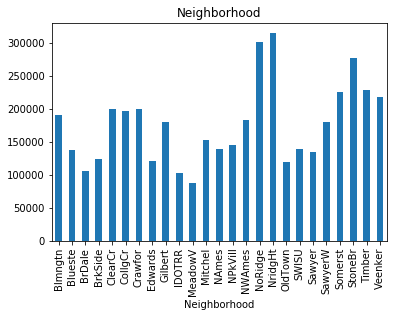

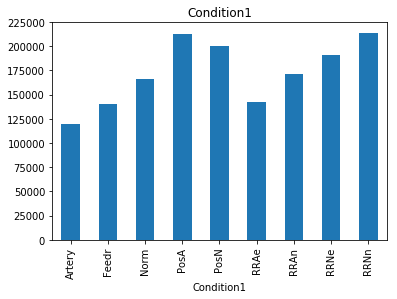

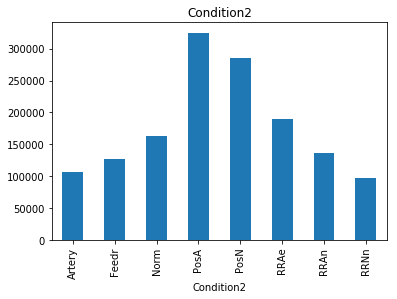

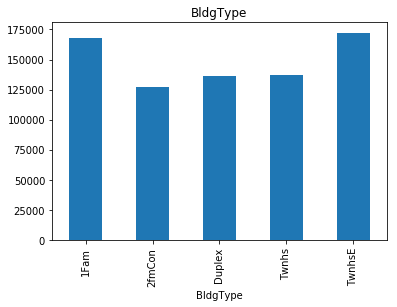

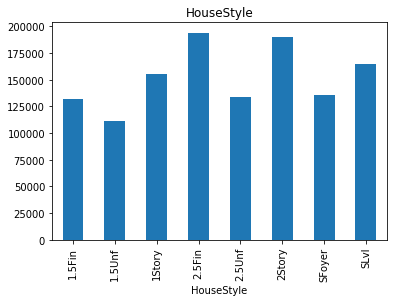

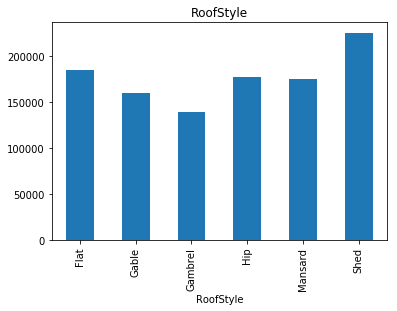

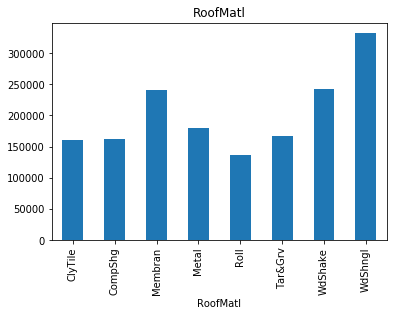

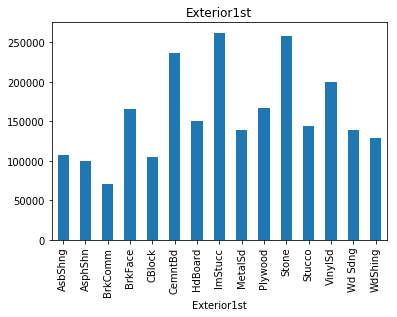

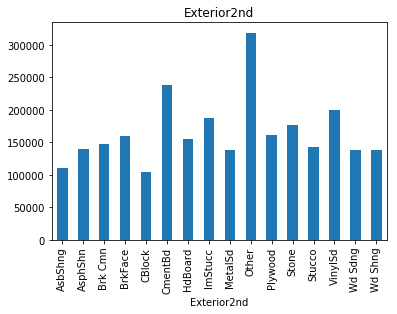

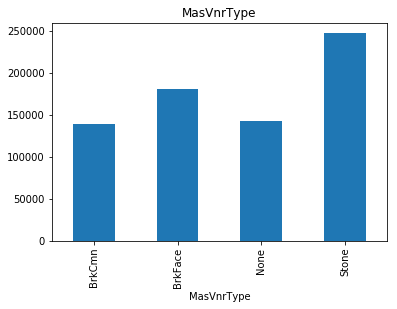

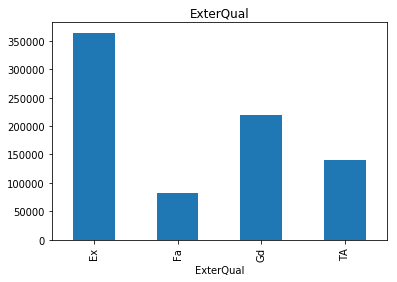

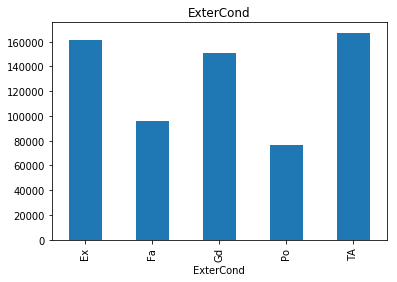

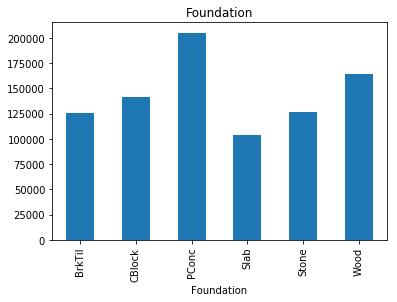

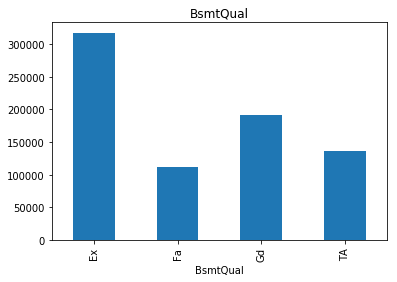

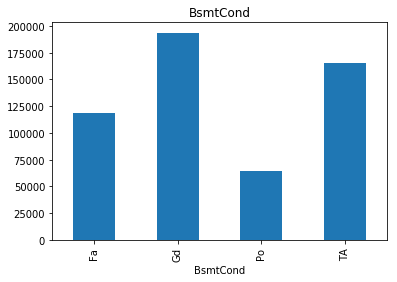

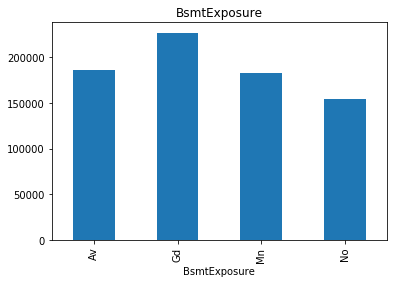

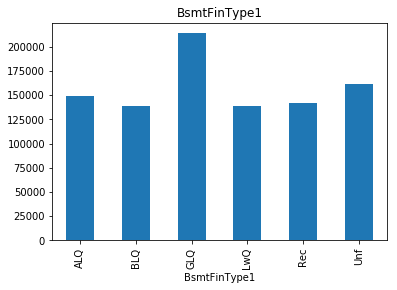

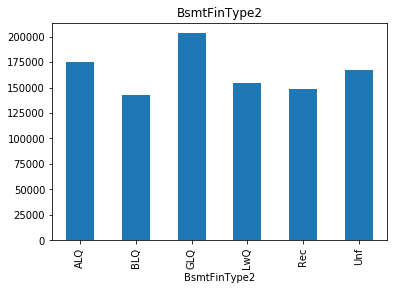

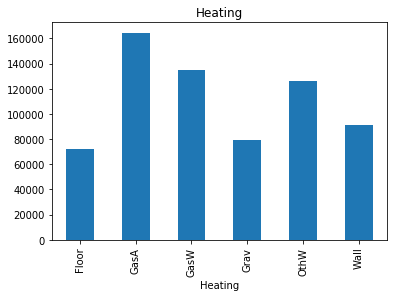

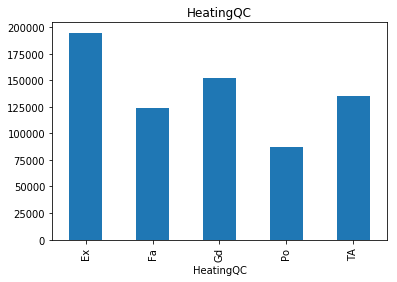

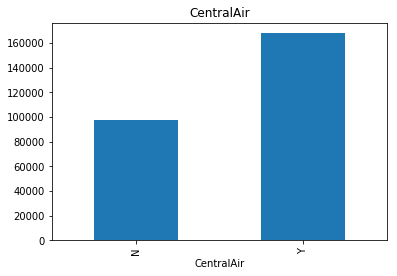

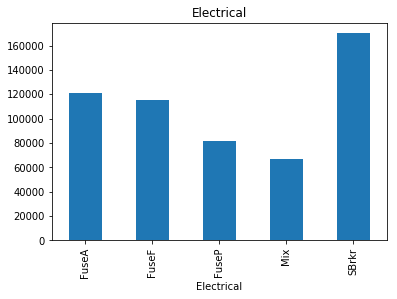

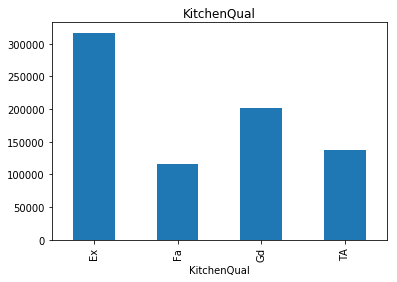

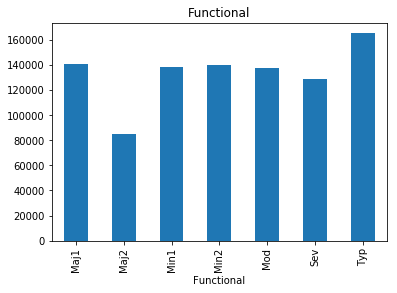

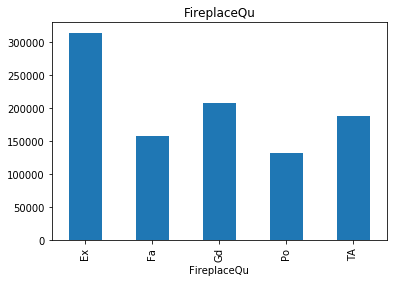

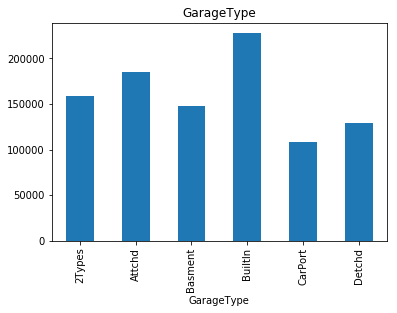

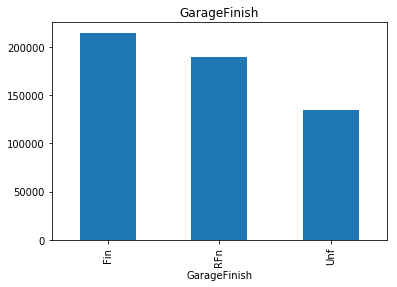

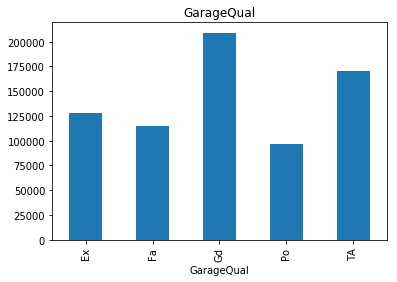

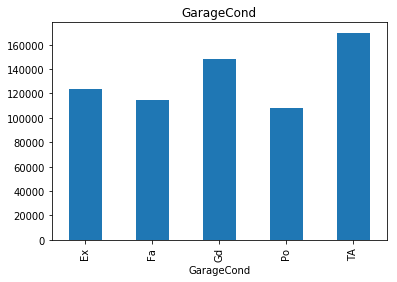

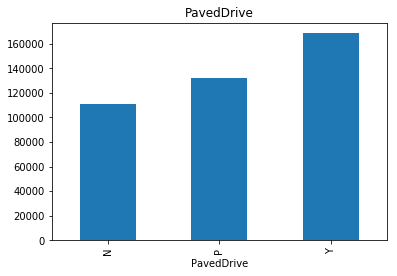

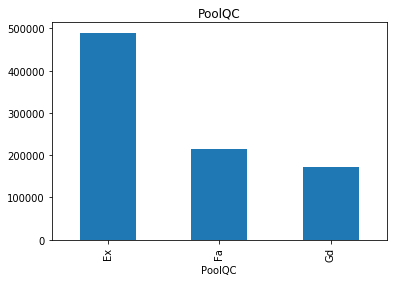

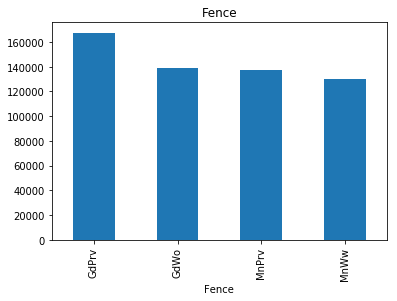

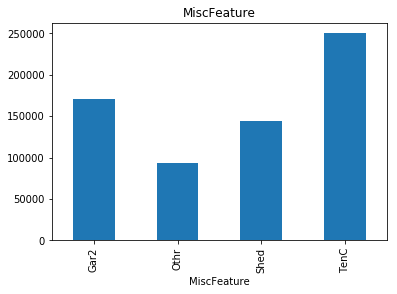

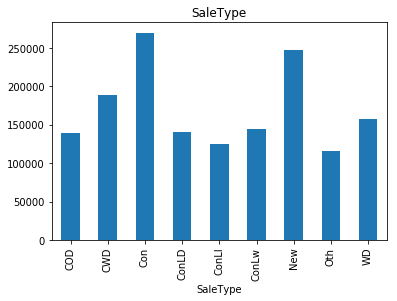

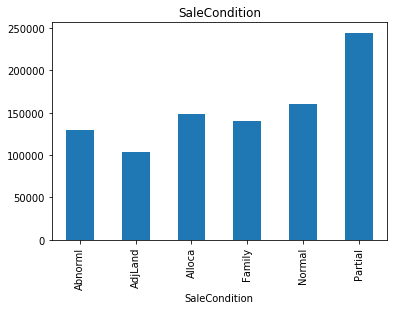

In [31]:
#let us see the distribution of each feature wrt the dependent variable
for feature in categorical_feature:
    dataset=data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

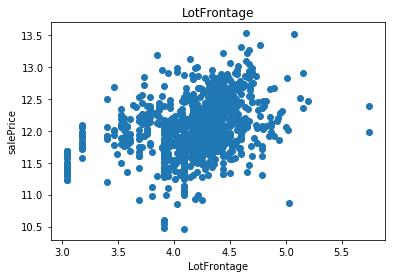

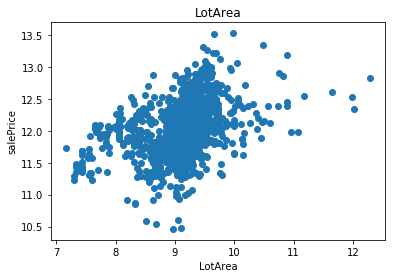

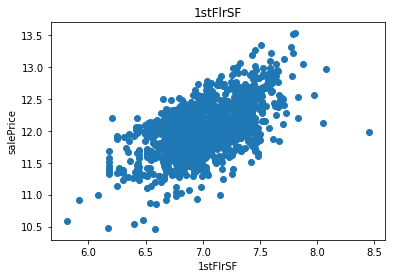

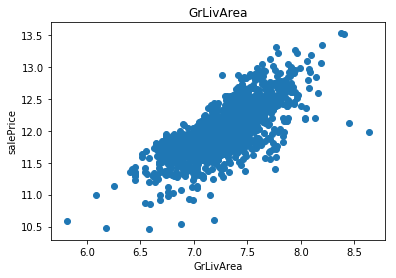

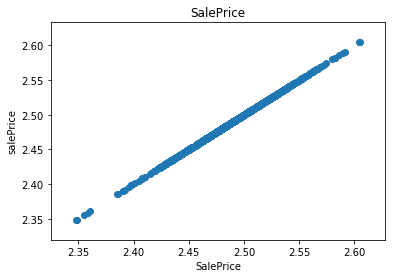

In [41]:
for feature in continous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset['SalePrice']=np.log(dataset['SalePrice'])
        plt.scatter(dataset[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('salePrice')
        plt.title(feature)
        plt.show()

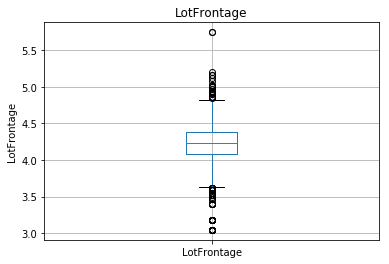

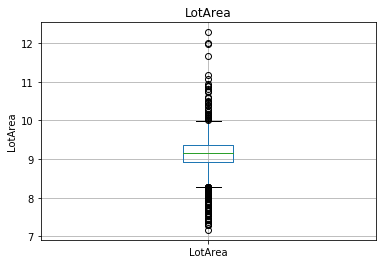

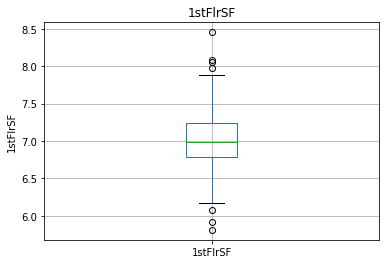

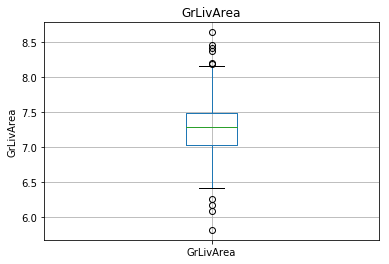

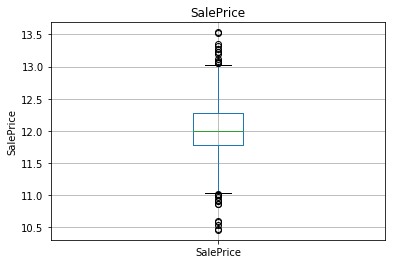

In [44]:
#to see outliers using boxplot
for feature in continous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()